In [1]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [22]:
df= pd.read_csv('1589505302_05152020_updated_ski_data_-_updated_ski_data.csv')
pd.set_option('display.max_columns', None)
df.head()

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,total_chairs,Runs,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
0,Alyeska Resort,Alaska,Alaska,3939,2500,250,1,0.0,0,2,2,0,0,2,7,76.0,2.0,1.0,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0
1,Eaglecrest Ski Area,Alaska,Alaska,2600,1540,1200,0,0.0,0,0,0,0,4,0,4,36.0,1.0,2.0,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,NaN
2,Hilltop Ski Area,Alaska,Alaska,2090,294,1796,0,0.0,0,0,0,1,0,2,3,13.0,1.0,1.0,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0
3,Arizona Snowbowl,Arizona,Arizona,11500,2300,9200,0,0.0,1,0,2,2,1,2,8,55.0,4.0,2.0,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,NaN
4,Sunrise Park Resort,Arizona,Arizona,11100,1800,9200,0,NaN,0,1,2,3,1,0,7,65.0,2.0,1.2,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0


In [4]:
df[df['Region']!=df['state']]

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,total_chairs,Runs,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
5,Yosemite Ski & Snowboard Area,Northern California,California,7800,600,7200,0,0.0,0,0,0,1,3,1,5,10.0,2.0,0.4,88.0,NaN,110.0,84.0,300.0,47.0,47.0,107.0,NaN
6,Bear Mountain,Sierra Nevada,California,8805,1665,7140,0,0.0,0,2,1,2,3,4,12,27.0,14.0,1.5,198.0,198.0,122.0,76.0,100.0,NaN,NaN,130.0,NaN
7,Bear Valley,Sierra Nevada,California,8500,1900,6600,0,0.0,1,1,0,2,4,2,10,67.0,2.0,1.2,1680.0,100.0,165.0,52.0,359.0,NaN,NaN,151.0,NaN
8,Boreal Mountain Resort,Sierra Nevada,California,7700,500,7200,0,0.0,0,1,1,3,1,2,8,33.0,6.0,1.0,380.0,200.0,150.0,54.0,400.0,49.0,NaN,150.0,200.0
9,Dodge Ridge,Sierra Nevada,California,8200,1600,6600,0,0.0,0,0,1,2,5,4,12,67.0,5.0,2.0,862.0,NaN,NaN,69.0,350.0,78.0,78.0,140.0,NaN
10,Donner Ski Ranch,Sierra Nevada,California,8012,750,7031,0,0.0,0,0,0,1,5,2,8,52.0,2.0,1.5,505.0,60.0,163.0,82.0,400.0,75.0,75.0,170.0,NaN
11,Heavenly Mountain Resort,Sierra Nevada,California,10067,3500,7170,2,0.0,2,7,1,5,3,8,28,97.0,3.0,5.5,4800.0,3379.0,155.0,64.0,360.0,NaN,NaN,157.0,NaN
12,June Mountain,Sierra Nevada,California,10090,2590,7545,0,NaN,0,2,0,0,4,1,7,41.0,2.0,2.0,1500.0,NaN,NaN,58.0,250.0,NaN,NaN,128.0,NaN
13,Kirkwood,Sierra Nevada,California,9800,2000,7800,0,0.0,0,2,1,5,1,3,12,85.0,2.0,2.5,2300.0,200.0,200.0,47.0,354.0,NaN,NaN,167.0,NaN
14,Mammoth Mountain Ski Area,Sierra Nevada,California,11053,3100,7953,3,0.0,2,9,1,6,4,0,25,154.0,7.0,3.0,3500.0,700.0,243.0,66.0,400.0,149.0,159.0,NaN,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               330 non-null    object 
 1   Region             330 non-null    object 
 2   state              330 non-null    object 
 3   summit_elev        330 non-null    int64  
 4   vertical_drop      330 non-null    int64  
 5   base_elev          330 non-null    int64  
 6   trams              330 non-null    int64  
 7   fastEight          164 non-null    float64
 8   fastSixes          330 non-null    int64  
 9   fastQuads          330 non-null    int64  
 10  quad               330 non-null    int64  
 11  triple             330 non-null    int64  
 12  double             330 non-null    int64  
 13  surface            330 non-null    int64  
 14  total_chairs       330 non-null    int64  
 15  Runs               326 non-null    float64
 16  TerrainParks       279 non

In [10]:
na_feature = [feature for feature in df.columns if df[feature].isnull().sum()>0]

In [11]:
na_feature

['fastEight',
 'Runs',
 'TerrainParks',
 'LongestRun_mi',
 'SkiableTerrain_ac',
 'Snow Making_ac',
 'daysOpenLastYear',
 'yearsOpen',
 'averageSnowfall',
 'AdultWeekday',
 'AdultWeekend',
 'projectedDaysOpen',
 'NightSkiing_ac']

In [19]:
for feature in na_feature:
    print(feature , str(df[feature].isnull().mean()*100) +' % missing values')

fastEight 50.303030303030305 % missing values
Runs 1.2121212121212122 % missing values
TerrainParks 15.454545454545453 % missing values
LongestRun_mi 1.5151515151515151 % missing values
SkiableTerrain_ac 0.9090909090909091 % missing values
Snow Making_ac 13.939393939393941 % missing values
daysOpenLastYear 15.454545454545453 % missing values
yearsOpen 0.30303030303030304 % missing values
averageSnowfall 4.242424242424243 % missing values
AdultWeekday 16.363636363636363 % missing values
AdultWeekend 15.454545454545453 % missing values
projectedDaysOpen 14.242424242424242 % missing values
NightSkiing_ac 43.333333333333336 % missing values


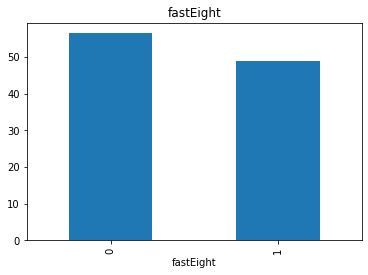

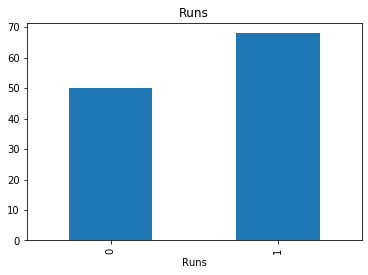

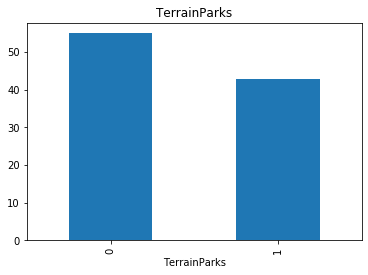

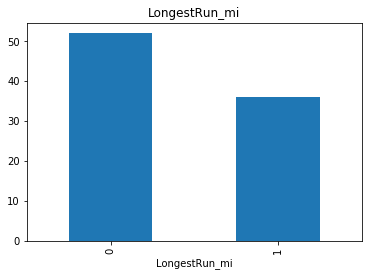

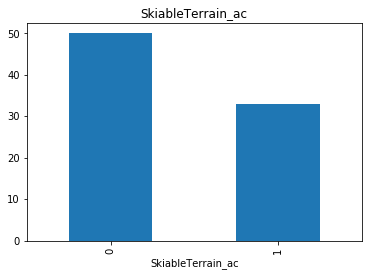

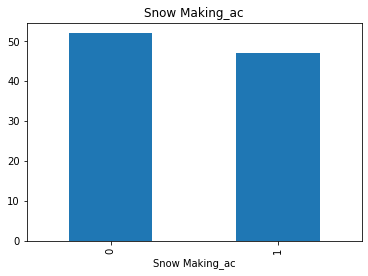

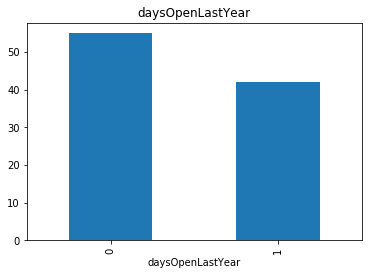

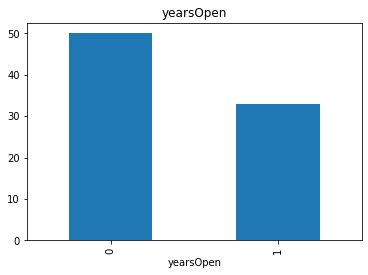

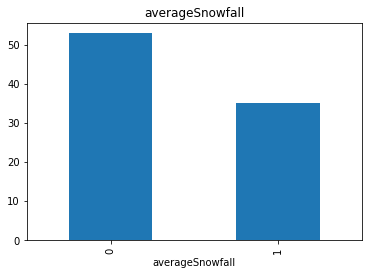

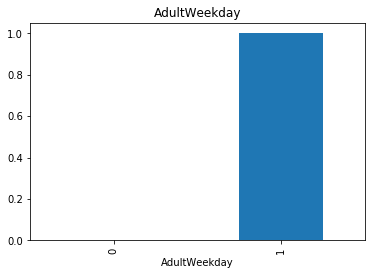

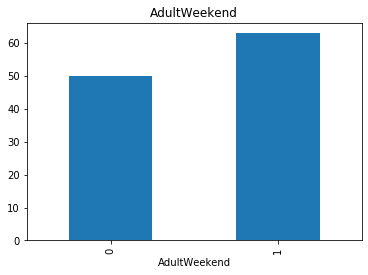

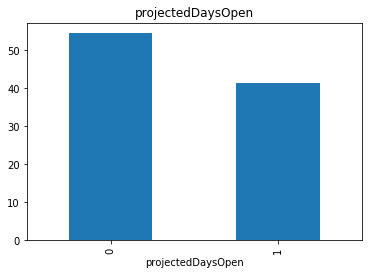

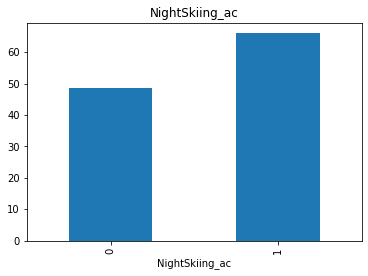

In [23]:
for feature in na_feature:
    data= df.copy()
    data[feature]= np.where(data[feature].isnull(),1,0)
    data.groupby(feature)['AdultWeekday'].median().plot.bar()
    plt.title(feature)
    plt.show()


In [24]:
num_feat= [feature for feature in df.columns if df[feature].dtypes!='O']

In [26]:
df[num_feat].head()

,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,total_chairs,Runs,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
0,3939,2500,250,1,0.0,0,2,2,0,0,2,7,76.0,2.0,1.0,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0
1,2600,1540,1200,0,0.0,0,0,0,0,4,0,4,36.0,1.0,2.0,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,NaN
2,2090,294,1796,0,0.0,0,0,0,1,0,2,3,13.0,1.0,1.0,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0
3,11500,2300,9200,0,0.0,1,0,2,2,1,2,8,55.0,4.0,2.0,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,NaN
4,11100,1800,9200,0,NaN,0,1,2,3,1,0,7,65.0,2.0,1.2,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0


In [27]:

disc_feat = [feature for feature in num_feat if df[feature].nunique()<25] 

In [32]:
disc_feat

['trams',
 'fastEight',
 'fastSixes',
 'fastQuads',
 'quad',
 'triple',
 'double',
 'surface',
 'TerrainParks']

In [35]:
con_feat= [feature for feature in num_feat if df[feature].nunique()>=25]

In [36]:
con_feat

['summit_elev',
 'vertical_drop',
 'base_elev',
 'total_chairs',
 'Runs',
 'LongestRun_mi',
 'SkiableTerrain_ac',
 'Snow Making_ac',
 'daysOpenLastYear',
 'yearsOpen',
 'averageSnowfall',
 'AdultWeekday',
 'AdultWeekend',
 'projectedDaysOpen',
 'NightSkiing_ac']

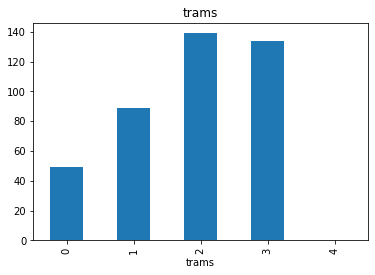

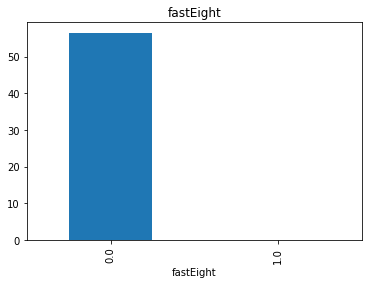

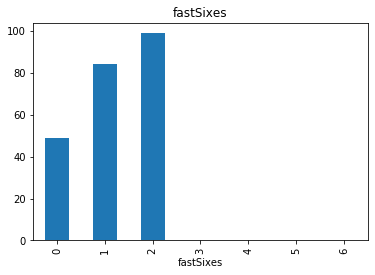

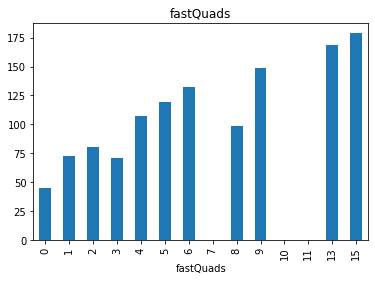

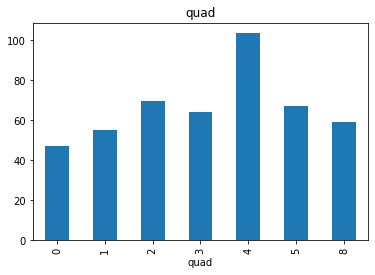

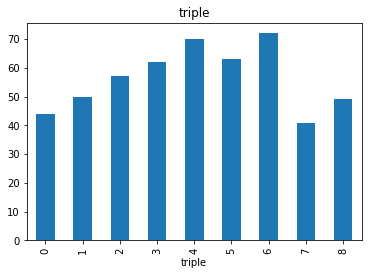

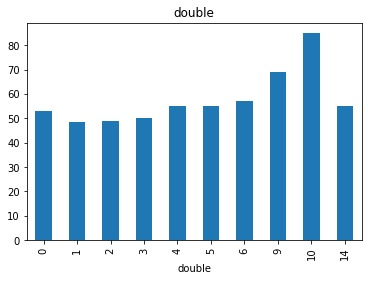

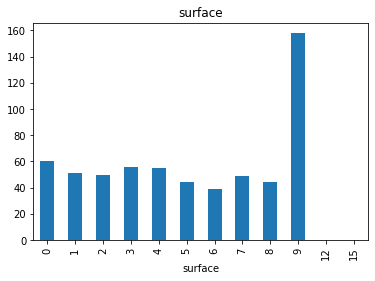

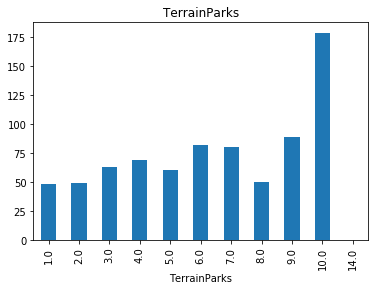

In [39]:
for feature in disc_feat:
    data=df.copy()
    data.groupby(feature)['AdultWeekday'].median().plot.bar()
    plt.title(feature)
    plt.show()

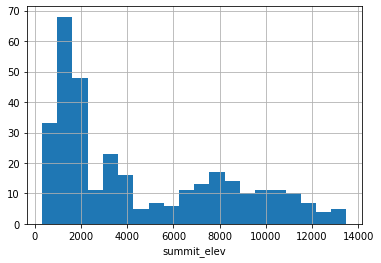

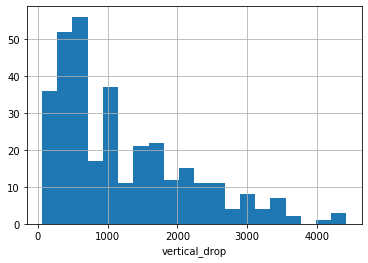

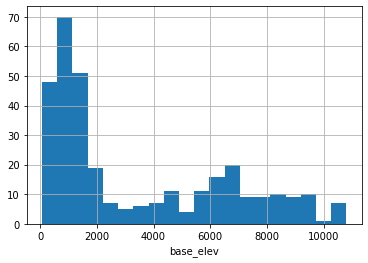

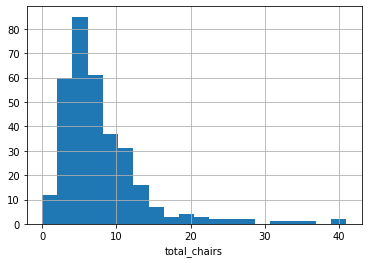

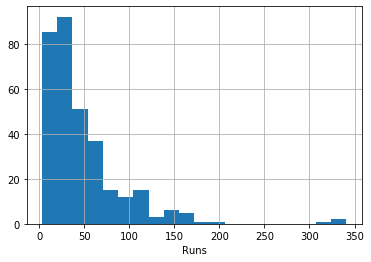

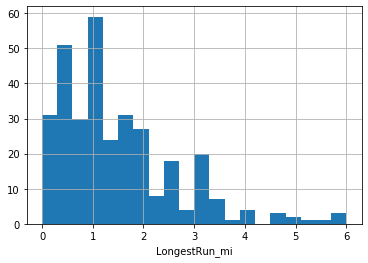

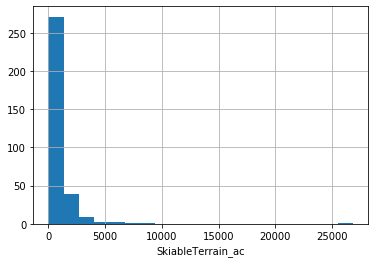

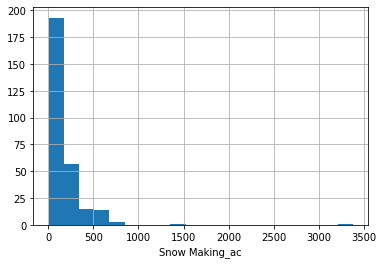

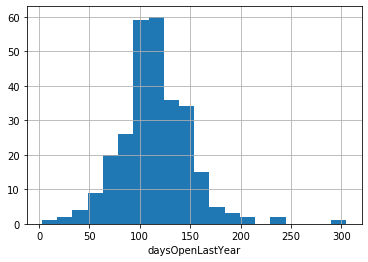

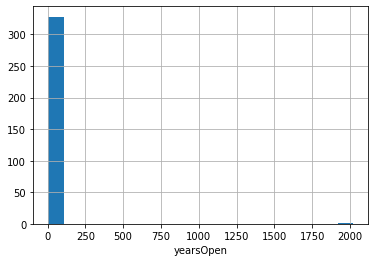

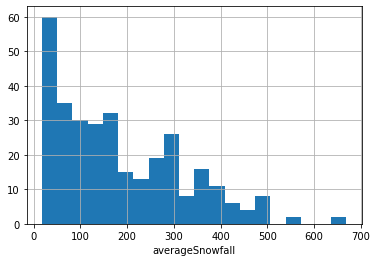

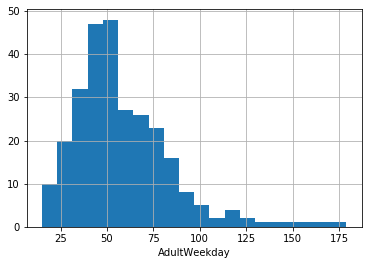

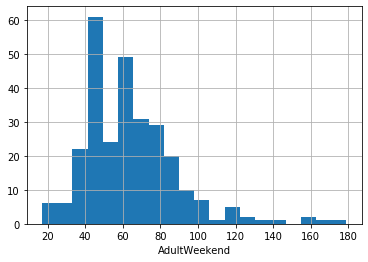

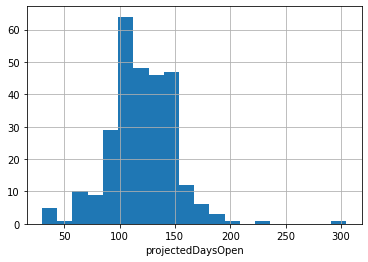

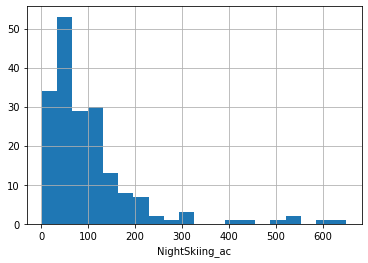

In [40]:
for feature in con_feat:
    data= df.copy()
    data[feature].hist(bins=20)
    plt.xlabel(feature)
    plt.show()

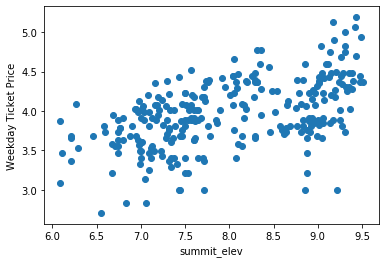

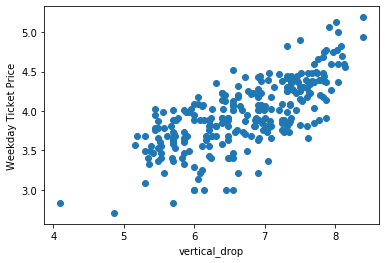

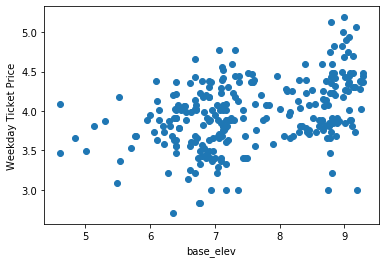

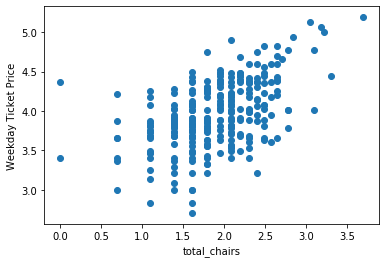

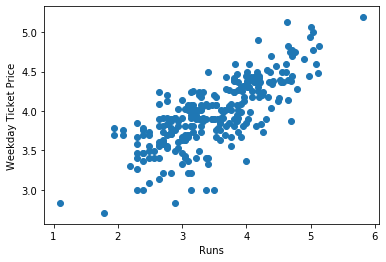

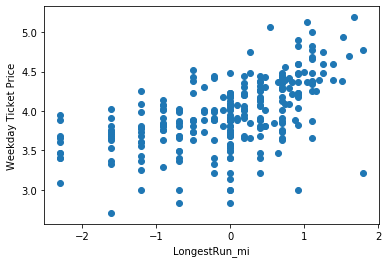

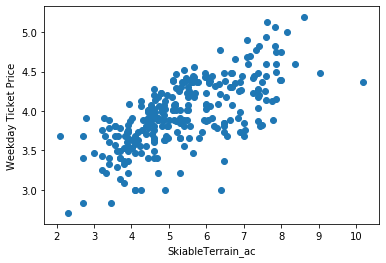

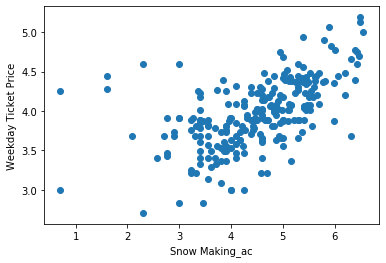

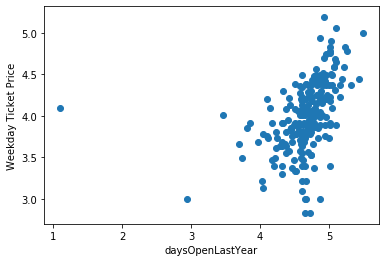

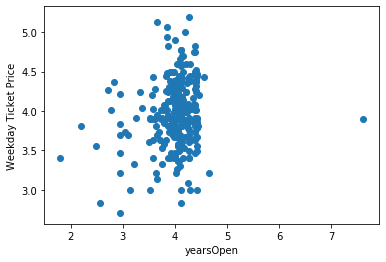

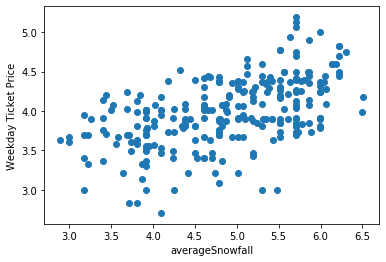

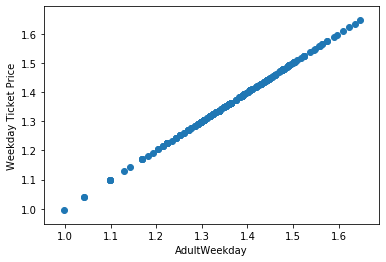

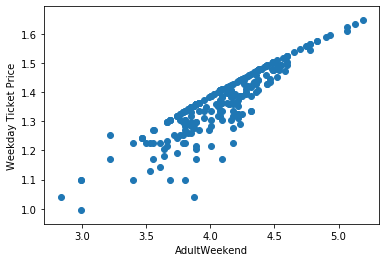

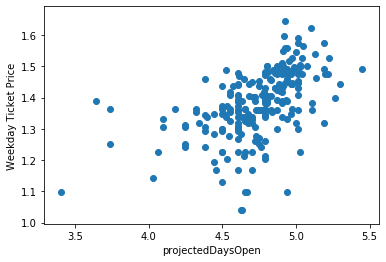

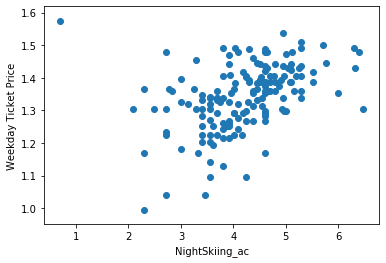

In [56]:
data= df.copy()
data['AdultWeekday']= np.log(data['AdultWeekday'])

for feature in con_feat:
    

    data[feature]= np.log(data[feature])
    
    plt.scatter(data[feature], data['AdultWeekday'])
    plt.xlabel(feature)
    plt.ylabel('Weekday Ticket Price')
    plt.show()

###Outliers

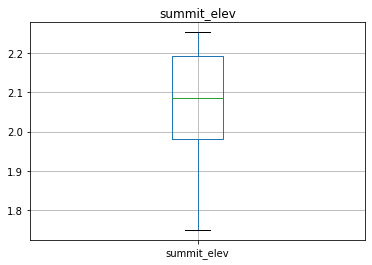

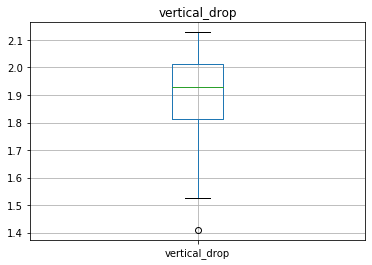

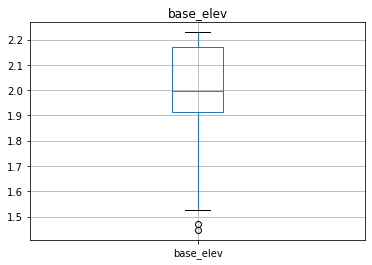

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


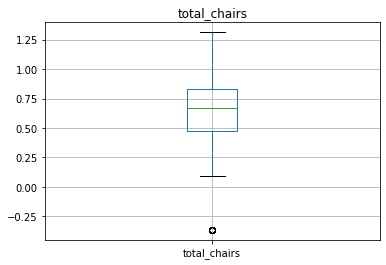

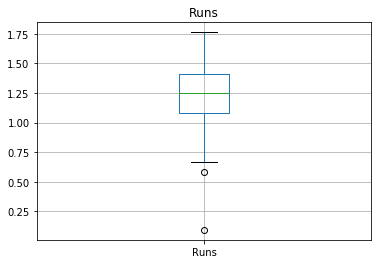

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


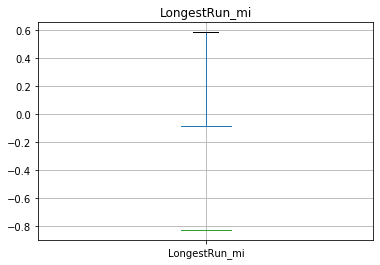

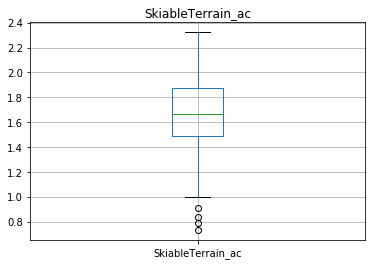

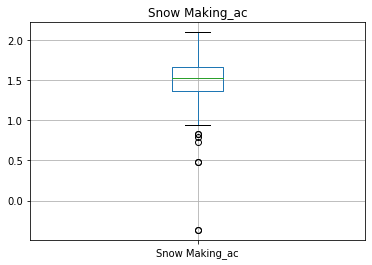

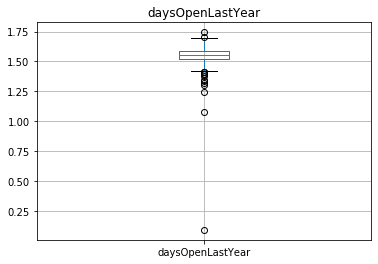

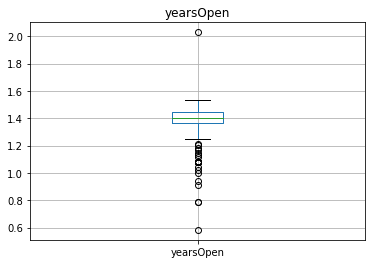

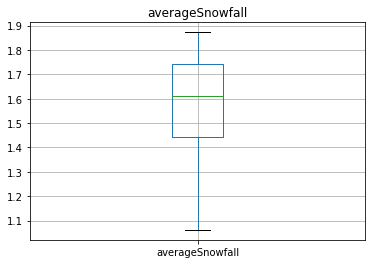

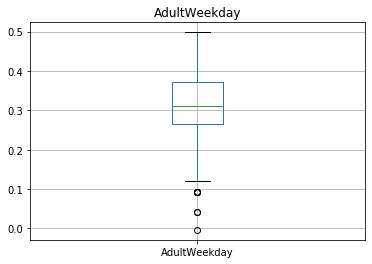

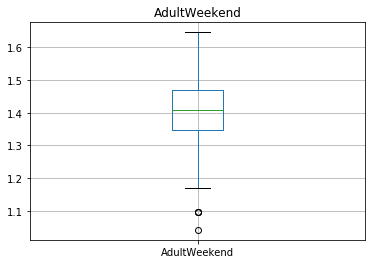

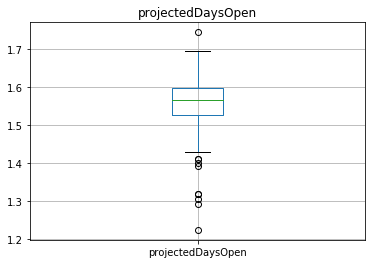

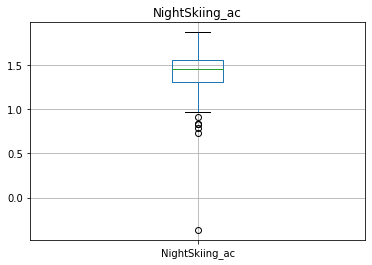

In [51]:
for feature in con_feat:
    data[feature]= np.log(data[feature])
    data.boxplot(column=feature)
    plt.title(feature)
    plt.show()

##Categorical Variables

In [53]:
cat_feat = [feature for feature in df.columns if df[feature].dtypes=='O']
for feature in cat_feat:
    print(feature+': has ' +str(data[feature].nunique())+' unique values')

Name: has 329 unique values
Region: has 38 unique values
state: has 35 unique values


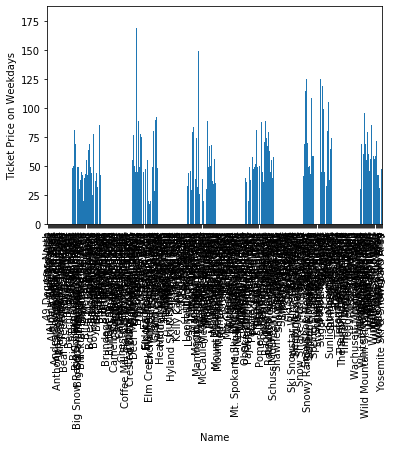

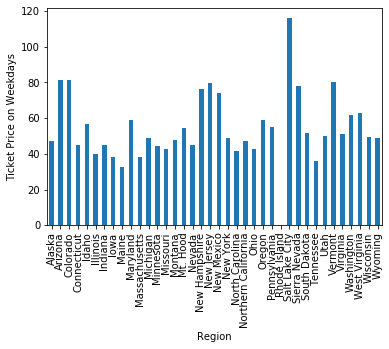

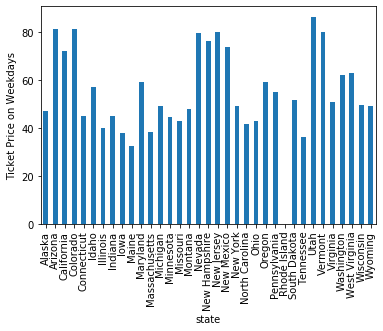

In [57]:
for feature in cat_feat:
    data= df.copy()
    data.groupby(feature)['AdultWeekday'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Ticket Price on Weekdays')
    plt.show()

In [175]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data['AdultWeekday'], random_state=0, test_size=0.25)

In [176]:
num_with_nan=[feature for feature in num_feat if X_train[feature].isnull().sum()>0]

In [177]:
num_with_nan

['fastEight',
 'Runs',
 'TerrainParks',
 'LongestRun_mi',
 'SkiableTerrain_ac',
 'Snow Making_ac',
 'daysOpenLastYear',
 'yearsOpen',
 'averageSnowfall',
 'AdultWeekday',
 'AdultWeekend',
 'projectedDaysOpen',
 'NightSkiing_ac']

In [178]:
for feature in num_with_nan:
    X_train[feature+'_nan']= np.where(X_train[feature].isnull(), 1,0)
    X_train[feature].fillna(X_train[feature].median(), inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [179]:
for feature in num_with_nan:
    X_test[feature+'_nan']= np.where(X_test[feature].isnull(), 1,0)
    X_test[feature].fillna(X_test[feature].median(), inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [180]:
X_train.agg([min,max]).T

,min,max
Name,49 Degrees North,Wolf Creek Ski Area
Region,Alaska,Wyoming
state,Alaska,Wyoming
summit_elev,420,13487
vertical_drop,60,4425
base_elev,78,10800
trams,0,4
fastEight,0,0
fastSixes,0,6
fastQuads,0,15


In [181]:
X_train.head()

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,total_chairs,Runs,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,fastEight_nan,Runs_nan,TerrainParks_nan,LongestRun_mi_nan,SkiableTerrain_ac_nan,Snow Making_ac_nan,daysOpenLastYear_nan,yearsOpen_nan,averageSnowfall_nan,AdultWeekday_nan,AdultWeekend_nan,projectedDaysOpen_nan,NightSkiing_ac_nan
45,Vail,Colorado,Colorado,11570,3450,8120,2,0.0,3,15,1,1,0,9,31,195.0,3.0,4.0,5289.0,461.0,149.0,57.0,354.0,50.0,60.0,142.0,72.0,0,0,0,0,0,0,0,0,0,1,1,0,1
159,Cannon Mountain,New Hampshire,New Hampshire,4080,2180,1900,1,0.0,0,1,2,3,1,3,11,97.0,3.0,2.3,285.0,192.0,124.0,81.0,160.0,79.0,79.0,143.0,72.0,0,0,0,0,0,0,0,0,0,0,0,0,1
150,Teton Pass Ski Resort,Montana,Montana,7200,1010,6190,0,0.0,0,0,0,0,1,2,3,43.0,1.0,3.0,330.0,100.0,40.0,54.0,250.0,39.0,39.0,150.0,72.0,1,0,0,0,0,1,0,0,0,0,0,0,1
164,King Pine,New Hampshire,New Hampshire,850,350,500,0,0.0,0,0,0,3,0,3,6,17.0,2.0,0.3,48.0,45.0,105.0,57.0,120.0,42.0,58.0,107.0,23.0,1,0,0,0,0,0,0,0,0,0,0,0,0
145,Lost Trail - Powder Mtn,Montana,Montana,8200,1800,6400,0,0.0,0,0,0,0,5,3,8,69.0,2.0,2.5,1800.0,100.0,84.0,81.0,325.0,46.0,46.0,80.0,72.0,1,0,0,0,0,1,0,0,0,0,0,0,1


In [182]:
for feature in con_feat:
    if feature not in ['total_chairs','LongestRun_mi']:
        X_train[feature]= np.log(X_train[feature])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [183]:
for feature in con_feat:
    if feature not in ['total_chairs','LongestRun_mi']:
        X_test[feature]= np.log(X_test[feature])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [184]:
X_train.agg([min,max]).T

,min,max
Name,49 Degrees North,Wolf Creek Ski Area
Region,Alaska,Wyoming
state,Alaska,Wyoming
summit_elev,6.04025,9.50948
vertical_drop,4.09434,8.39503
base_elev,4.35671,9.2873
trams,0,4
fastEight,0,0
fastSixes,0,6
fastQuads,0,15


In [185]:
y_train.fillna(y_train.median(), inplace=True)

In [186]:
y_test.fillna(y_test.median(), inplace=True)

In [187]:
y_train= np.log(y_train)

In [188]:
y_test= np.log(y_test)

In [189]:
feature_scale= [feature for feature in X_train if feature not in ['Name', 'Region','state','AdultWeekday']]
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
scaler.fit(X_train[feature_scale])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [190]:
X_train= pd.concat([X_train[['Name', 'Region','state','AdultWeekday']].reset_index(drop=True), pd.DataFrame(scaler.transform(X_train[feature_scale]),columns= feature_scale)],axis=1)

In [191]:
X_train.head()

,Name,Region,state,AdultWeekday,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,total_chairs,Runs,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekend,projectedDaysOpen,NightSkiing_ac,fastEight_nan,Runs_nan,TerrainParks_nan,LongestRun_mi_nan,SkiableTerrain_ac_nan,Snow Making_ac_nan,daysOpenLastYear_nan,yearsOpen_nan,averageSnowfall_nan,AdultWeekday_nan,AdultWeekend_nan,projectedDaysOpen_nan,NightSkiing_ac_nan
0,Vail,Colorado,Colorado,3.912023,0.955808,0.942126,0.942154,0.50,0.0,0.5,1.000000,0.125,0.125,0.000000,0.600000,0.756098,0.881925,0.222222,0.666667,0.794347,0.731985,0.758739,0.340990,0.823952,0.535700,0.811173,0.472903,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,Cannon Mountain,New Hampshire,New Hampshire,4.369448,0.655361,0.835388,0.647569,0.25,0.0,0.0,0.066667,0.250,0.375,0.166667,0.200000,0.268293,0.734397,0.222222,0.383333,0.424346,0.614133,0.668144,0.405906,0.604302,0.652558,0.815491,0.472903,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,Teton Pass Ski Resort,Montana,Montana,3.663562,0.819082,0.656492,0.887111,0.00,0.0,0.0,0.000000,0.000,0.000,0.166667,0.133333,0.073171,0.562526,0.000000,0.500000,0.442917,0.526362,0.110068,0.331002,0.727742,0.352713,0.844899,0.472903,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,King Pine,New Hampshire,New Hampshire,3.737670,0.203210,0.410072,0.376811,0.00,0.0,0.0,0.000000,0.000,0.375,0.000000,0.200000,0.146341,0.366470,0.111111,0.050000,0.198703,0.418923,0.586104,0.340990,0.524731,0.521300,0.637032,0.199528,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Lost Trail - Powder Mtn,Montana,Montana,3.828641,0.856570,0.790851,0.893877,0.00,0.0,0.0,0.000000,0.000,0.000,0.833333,0.200000,0.195122,0.662437,0.111111,0.416667,0.657813,0.526362,0.476036,0.405906,0.800311,0.422836,0.458088,0.472903,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [192]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel


In [193]:
X_train=X_train.drop(['Name','Region','state','AdultWeekday'], axis=1)

In [194]:
feature_sel_model= SelectFromModel(Lasso(alpha= 0.005, random_state=0))
feature_sel_model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [195]:
feature_sel_model.get_support()

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True])

In [196]:
selected_feat= X_train.columns[(feature_sel_model.get_support())]

In [200]:
X_train=X_train[selected_feat]
X_test=X_test[selected_feat]

In [214]:
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
regressor=LinearRegression()
##Fit train
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)
print('Accuracy of LR',mean_squared_error(y_pred,y_test))

Accuracy of LR 91.39634673021189
